In [14]:
# importing important library
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
import matplotlib.pyplot as plt
% matplotlib inline

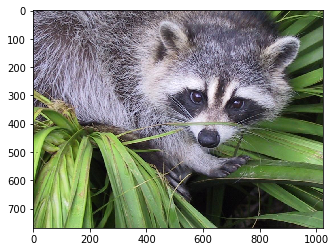

In [31]:
# loading the images
img = misc.face(gray=False)
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [32]:
# shape of the image
img.shape

(768, 1024, 3)

In [33]:
rows = img.shape[0]
cols = img.shape[1]
img[:2]

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]]], dtype=uint8)

In [34]:
# reshaping the image dimesnsions
img = img.reshape(img.shape[0]*img.shape[1],3)
img.shape

(786432, 3)

In [35]:
# printing the few rows of image
img[:1025]

array([[121, 112, 131],
       [138, 129, 148],
       [153, 144, 165],
       ...,
       [131, 136,  82],
       [139, 144,  90],
       [ 89,  82, 100]], dtype=uint8)

In [36]:
# training the model
kmeans = KMeans(n_clusters = 128, n_init=10, max_iter=200)
kmeans.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=128, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
# Save Clusters
clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(rows,cols); 
 
np.save('codebook_racoon.npy',clusters)    
io.imsave('compressed_racoon.png',labels)

## Decompression

We also need to decompress the image in order to visualise the reconstructed image which is obviously an outcome of **lossy compression** performed. 

* Below code does the decompression by assigning the 3-d colours from the code book to the each pixel depending upon its label.

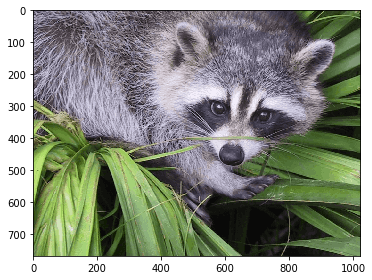

In [38]:
centers = np.load('codebook_racoon.npy')
c_image = io.imread('compressed_racoon.png')
 
image = np.zeros((c_image.shape[0],c_image.shape[1],3),dtype=np.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]
io.imsave('reconstructed_racoon.png',image);
io.imshow(image)
io.show()

## Observation
### Compressed racoon image size: 462 KB
### Decompressed racoon image size: 815 KB

> We can see the reconstructed image after decompression below. **Though the reconstructed image has lost a lot of pixel colour information but still you won’t find any major difference visually.**

> Also, you can visualise these 128 colours found in the reconstructed image by viewing the colours in the codebook separately (may be by displaying **mono-coloured square box**). These colours are the centroids of clusters formed after performing k-means on original image.